## Assignment

Using following dataset http://www.ananth.in/RoadMarkingDete…/RoadmarkingDataset.zip create convolutional neural network that will predict navigation path (forward, left, right) for autonomous vehicle system.
Allowed usage of images that have following fields: label leftturn, rightturn and forward. Ignore information about coordinates.

<b>Disclaimer: “A Practical System for Road Marking Detection and Recognition”, Tao Wu and Ananth Ranganathan, IEEE Intelligent Vehicles Symposium, 2012.</b>

## Prepare Dataset

In [1]:
# Print Readme
readme = open("RoadmarkingDataset/Readme.txt")
print(readme.read())

Roadmarking dataset
-------------------

The dataset consists of 1443 images of road markings and groundtruth position
and labels are given in the file dataset_annotations.txt in CSV format as
follows -

x1,y1,x2,y2,x3,y3,x4,y4,label,image_filename

where the first 8 numbers denote the bounding box in the image in pixel 
coordinates.
Questions about the dataset can be sent to 
Ananth Ranganathan (aranganathan@honda-ri.com) or Tao Wu (taowu@umiacs.umd.edu)

Please cite the following paper if using this dataset -

"A Practical System for Road Marking Detection and Recognition",
Tao Wu and Ananth Ranganathan
IEEE Intelligent Vehicles Symposium, 2012.

Calibration information is as follows -
The transform matrix A -
[0.197907   -0.178787       360.82  ]
[0          -0.00504166     50.9823 ]
[0          -0.000446185    1       ]

And the POI boundaries are:
x: [-1000, 1500] and y: [-1200, 1800]
where the transform matrix A is defined for the transform equation: [u,v,f]' = A' [x-250, y, 1]'


In [2]:
# image_filename for some reason contained *.png files but dataset was in *.jpg files. So before this step, I manually replaced *.png with *.jpg in dataset_annotations.txt file
import pandas
dataset = pandas.read_csv("RoadmarkingDataset/dataset_annotations.txt", names=["x1","y1","x2","y2","x3","y3","x4","y4","label","image_filename"])

In [3]:
# Let's have a look at our data
dataset.head()

,x1,y1,x2,y2,x3,y3,x4,y4,label,image_filename
0,321.964233,456.406830,433.777863,335.275360,344.327148,344.327148,317.166656,317.166656,stop,roadmark_0001.jpg
1,313.977539,453.744598,433.777863,329.950928,350.500000,349.265442,317.166656,317.166656,stop,roadmark_0002.jpg
2,307.321960,449.751251,429.784515,325.957581,352.969147,351.734558,317.166656,320.870361,stop,roadmark_0003.jpg
3,299.335266,452.413483,431.115631,323.295349,359.141968,359.141968,320.870361,322.104950,stop,roadmark_0004.jpg
4,295.341919,461.731293,431.115631,316.639771,362.845673,361.611115,322.104950,325.808655,stop,roadmark_0005.jpg


In [4]:
# Get shape of  our dataset
print (dataset.shape)

(1440, 10)


In [5]:
# We don't need coordinates
dataset.drop(dataset.columns[[0,1,2,3,4,5,6,7]], axis=1, inplace=True)

In [6]:
print (dataset.shape)

(1440, 2)


In [7]:
dataset.head()

#So, now we have two columns with label and with image path

,label,image_filename
0,stop,roadmark_0001.jpg
1,stop,roadmark_0002.jpg
2,stop,roadmark_0003.jpg
3,stop,roadmark_0004.jpg
4,stop,roadmark_0005.jpg


In [8]:
# Now let us remove everything we don't need
needed_features = ["forward", "leftturn", "rightturn"]
dataset = dataset[dataset.label.isin(needed_features)]
print (dataset.shape)
dataset.head()

(883, 2)


,label,image_filename
10,leftturn,roadmark_0011.jpg
11,leftturn,roadmark_0012.jpg
12,leftturn,roadmark_0013.jpg
13,leftturn,roadmark_0014.jpg
14,leftturn,roadmark_0015.jpg


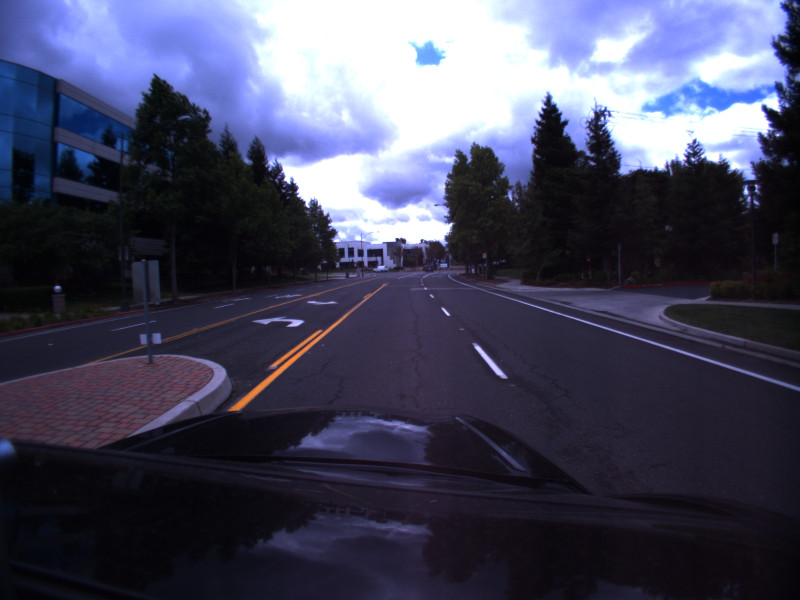

In [9]:
# Print first image
from IPython.display import Image, display
image = Image(filename="RoadmarkingDataset/roadmark_0011.jpg")
display(image)

### Split dataset into Train and Test sets

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dataset, dataset, test_size = 0.2, random_state=57)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(706, 2)
(177, 2)
(706, 2)
(177, 2)


In [12]:
cd RoadmarkingDataset

C:\Users\vieliashevskyi\DataScienceSchool\Homework\05 CNN for Image Recognition\RoadmarkingDataset


In [13]:
!mkdir "Train_set"
!mkdir "Test_set"

In [14]:
cd "Train_set"

C:\Users\vieliashevskyi\DataScienceSchool\Homework\05 CNN for Image Recognition\RoadmarkingDataset\Train_set


In [15]:
!mkdir "forward"
!mkdir "leftturn"
!mkdir "rightturn"

In [16]:
cd ..

C:\Users\vieliashevskyi\DataScienceSchool\Homework\05 CNN for Image Recognition\RoadmarkingDataset


In [17]:
cd Test_set

C:\Users\vieliashevskyi\DataScienceSchool\Homework\05 CNN for Image Recognition\RoadmarkingDataset\Test_set


In [18]:
!mkdir "forward"
!mkdir "leftturn"
!mkdir "rightturn"

In [19]:
cd ..

C:\Users\vieliashevskyi\DataScienceSchool\Homework\05 CNN for Image Recognition\RoadmarkingDataset


In [20]:
cd RoadmarkingDataset

[WinError 2] The system cannot find the file specified: 'RoadmarkingDataset'
C:\Users\vieliashevskyi\DataScienceSchool\Homework\05 CNN for Image Recognition\RoadmarkingDataset


In [21]:
from shutil import copyfile

Train_folder = "Train_set"
Test_folder = "Test_set"

forward_folder = "forward"
leftturn_folder = "leftturn"
rightturn_folder = "rightturn"

new_loc = ""
print ("Copy Train data...")
for index, (image, label) in enumerate(zip(X_train.image_filename, X_train.label)):
    if label == "forward":
        new_loc = Train_folder+"/"+forward_folder+"/"+image
    elif label == "leftturn":
        new_loc = Train_folder+"/"+leftturn_folder+"/"+image
    elif label == "rightturn":
        new_loc = Train_folder+"/"+rightturn_folder+"/"+image
    
    copyfile(image, new_loc)

print ("Train data copied!")
print ("Copy Test data...")
for index, (image, label) in enumerate(zip(Y_test.image_filename, Y_test.label)):
    if label == "forward":
        new_loc = Test_folder+"/"+forward_folder+"/"+image
    elif label == "leftturn":
        new_loc = Test_folder+"/"+leftturn_folder+"/"+image
    elif label == "rightturn":
        new_loc = Test_folder+"/"+rightturn_folder+"/"+image
            
    copyfile(image, new_loc)
    
print ("Test data copied!")

Copy Train data...
Train data copied!
Copy Test data...
Test data copied!


In [22]:
cd ..

C:\Users\vieliashevskyi\DataScienceSchool\Homework\05 CNN for Image Recognition


## Load Keras libraries

In [34]:
IMG_width = 64
IMG_height = 64

In [35]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [36]:
classifier = Sequential()
classifier.add(Convolution2D(32,(3,3), input_shape=(IMG_width,IMG_height,3), activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())

In [37]:
classifier.add(Dense(10, activation = "relu"))
classifier.add(Dense(10, activation = 'relu'))
classifier.add(Dense(10, activation = 'relu'))
classifier.add(Dense(10, activation = 'relu'))
classifier.add(Dense(units=3, activation="softmax"))

classifier.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [38]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)


In [39]:
train_generator = train_datagen.flow_from_directory(
    'RoadmarkingDataset/Train_set',
    target_size=(IMG_width, IMG_height),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    'RoadmarkingDataset/Test_set',
    target_size=(IMG_width, IMG_height),
    batch_size=32,
    class_mode='categorical')

Found 706 images belonging to 3 classes.
Found 177 images belonging to 3 classes.


In [40]:
print ("Fitting model")
classifier.fit_generator(
    train_generator,
    steps_per_epoch = 1000,
    epochs = 10,
    validation_data=test_generator,
    validation_steps=1000
)
print ("Model created")

Fitting model
Epoch 1/10
1000/1000 [==============================] - 510s 510ms/step - loss: 0.4901 - acc: 0.8057 - val_loss: 0.3833 - val_acc: 0.8249
Epoch 2/10
1000/1000 [==============================] - 536s 536ms/step - loss: 0.3163 - acc: 0.8695 - val_loss: 0.4007 - val_acc: 0.8700
Epoch 3/10
1000/1000 [==============================] - 504s 504ms/step - loss: 0.2640 - acc: 0.8856 - val_loss: 0.3421 - val_acc: 0.8303
Epoch 4/10
1000/1000 [==============================] - 508s 508ms/step - loss: 0.2376 - acc: 0.8974 - val_loss: 0.3094 - val_acc: 0.8644
Epoch 5/10
1000/1000 [==============================] - 533s 533ms/step - loss: 0.2103 - acc: 0.9097 - val_loss: 0.3400 - val_acc: 0.8532
Epoch 6/10
1000/1000 [==============================] - 521s 521ms/step - loss: 0.1995 - acc: 0.9146 - val_loss: 0.3441 - val_acc: 0.8700
Epoch 7/10
1000/1000 [==============================] - 555s 555ms/step - loss: 0.1963 - acc: 0.9152 - val_loss: 0.3471 - val_acc: 0.8814
Epoch 8/10
1000/1000

In [41]:
print ("Saving model")
import os

target_dir = './models/'
if not os.path.exists(target_dir):
    os.mkdir(target_dir)

classifier.save('./models/model.h5')
classifier.save_weights('./models/weights.h5')

print ("Model saved")

Saving model
Model saved


In [42]:
print ("What index corresponds to what class:")
print (train_generator.class_indices)

What index corresponds to what class:
{'forward': 0, 'leftturn': 1, 'rightturn': 2}


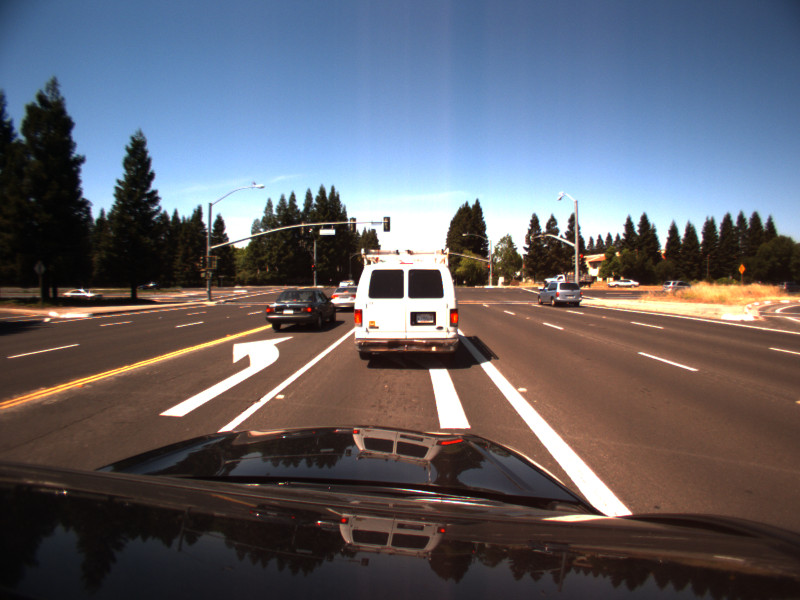

1/1 [==============================] - 0s 78ms/step
[0. 1. 0.]
Answer: 1
Turn Left


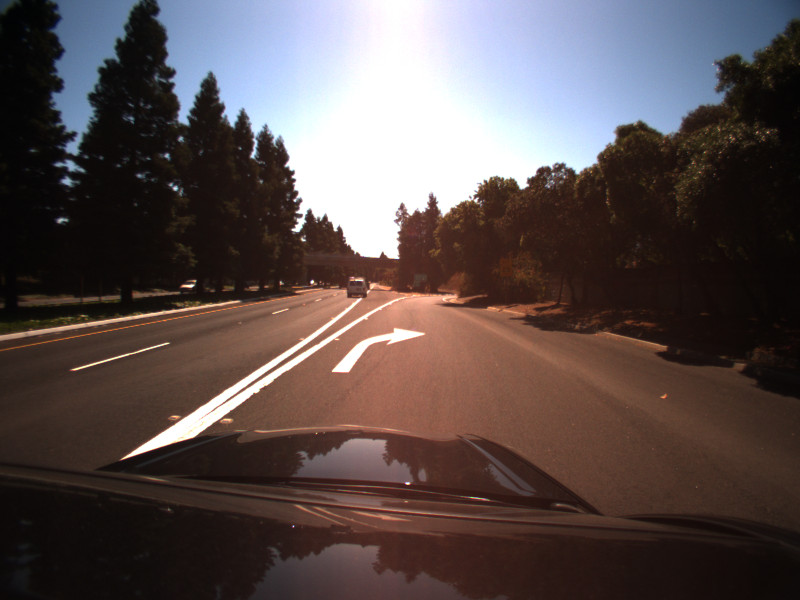

1/1 [==============================] - 0s 1ms/step
[0. 1. 0.]
Answer: 1
Turn Left


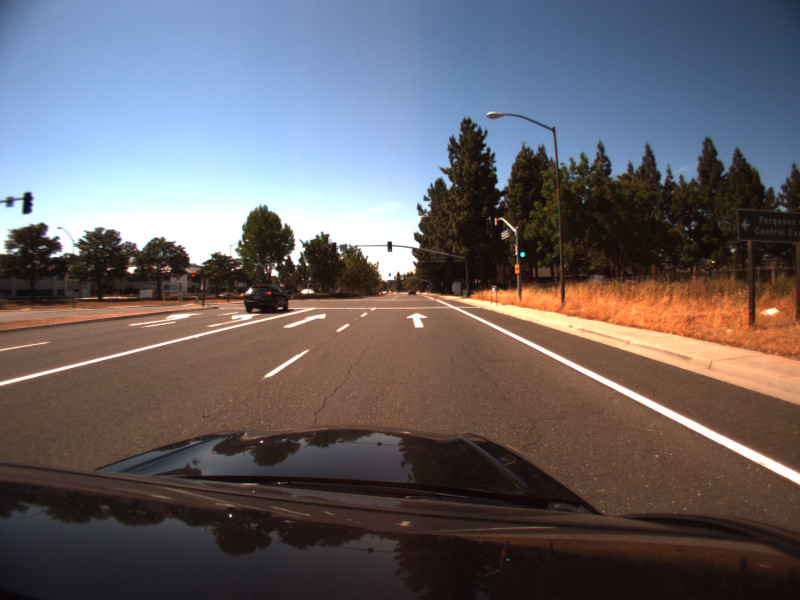

1/1 [==============================] - 0s 1ms/step
[0.8605002  0.05999502 0.07950471]
Answer: 0
Move Forward


In [43]:
from keras.preprocessing import image
import numpy

# This 3 images were removed from Train and Test sets (Random Test)
out_of_set = ["RoadmarkingDataset/rt/rt-left.jpg", "RoadmarkingDataset/rt/rt-right.jpg", "RoadmarkingDataset/rt/rt-forward.jpg"]

def test_rt (file):
    # Image preview that was not in train
    _image = Image(file)
    display(_image)
    
    # Predic based on created model
    rt_image = image.load_img(file, target_size=(IMG_height,IMG_width))
    rt_image = image.img_to_array(rt_image)
    rt_image = numpy.expand_dims(rt_image, axis=0)
    result = classifier.predict(rt_image, verbose=1)
    result = result[0]
    # Print result
    print (result)

    # Calculate answer based on argmax function
    answer = numpy.argmax(result)
    print ("Answer:", answer)
    
    if answer == 0:
        print("Move Forward")
    elif answer == 1:
        print("Turn Left")
    elif answer == 2:
        print("Turn Right")
        
for rtimage in out_of_set:
    test_rt(rtimage)